** `bernoulli` is the Bernoulli distribution which is the special case of the binomial distribution when there is just one trial `(bernoulli(x) === binomial(1, x))`. That is, if the data is coded as 4 successes out of 6 `(x = 4; n = 6)` it would be most convenient to use a binomial distribution. If the data is coded like `[1, 1, 1, 1, 0, 0]` it would be more convenient to use a Bernoulli distribution. The result would in any case be the same.

In [1]:
# Import libraries
import pystan # install with pip install pystan
import pandas as pd
import numpy as np

# The Stan model as a string.
model_string = """
data {
  # Number of data points
  int n1;
  int n2;
  # Number of successes
  int y1[n1];
  int y2[n2];
}

parameters {
  real<lower=0, upper=1> theta1;
  real<lower=0, upper=1> theta2;
}

model {  
  theta1 ~ beta(1, 1);
  theta2 ~ beta(1, 1);
  y1 ~ bernoulli(theta1);
  y2 ~ bernoulli(theta2); 
}

generated quantities {
}
"""

y1 = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
y2 = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
data_list = {'y1' : y1, 'y2' : y2, 'n1' : len(y1), 'n2' : len(y2)}

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_52e804325538434ed998ef88b873f423 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpdq6fgl24/stanfit4anon_model_52e804325538434ed998ef88b873f423_3218074303203673824.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_52e804325538434ed998ef88b873f423.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1   0.25  2.1e-3   0.12   0.06   0.16   0.24   0.33   0.51   2985    1.0
theta2   0.58  2.5e-3   0.13   0.32   0.49   0.59   0.68   0.83   2974    1.0
lp__   -15.89    0.02   0.95 -18.49  -16.3 -15.59 -15.19 -14.92   1741    1.0

Samples were drawn using NUTS at Sun Nov  4 22:20:02 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


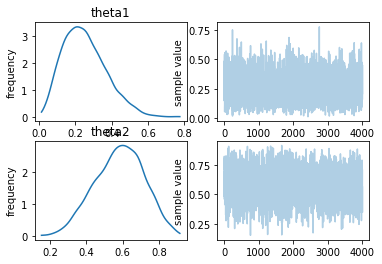

In [2]:
# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

## 2. Manipulating samples
To inspect and manipulate samples from individual parameters it is useful to convert the Stan “object” into a simple dataframe which gets one column per parameter: 

     theta1    theta2       lp__
0  0.180124  0.459250 -15.450865
1  0.249327  0.602857 -14.907857
2  0.369275  0.588995 -15.287721
3  0.348196  0.549989 -15.194490
4  0.448051  0.853138 -18.460396
0.2405
AxesSubplot(0.125,0.125;0.775x0.755)


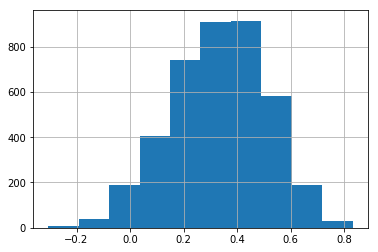

In [3]:
s = pd.DataFrame(stan_samples.extract())
print(s.head())
print(np.mean(abs(s.theta2 - s.theta1) < 0.2))
print((s.theta2 - s.theta1).hist())

## 3. Cows and disease

Farmer Jöns has a huge number of cows. Earlier this year he ran an experiment where he gave 10 cows medicine A and 10 medicine B and then measured whether they got sick `0` or not `1` during the summer season. Here is the resulting data:

In [4]:
cowA = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
cowB = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]

**→ Jöns now wants to know: How effective are the drugs? What is the evidence that medicine A is better or worse than medicine B?**

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_52e804325538434ed998ef88b873f423 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpdc5b_6v7/stanfit4anon_model_52e804325538434ed998ef88b873f423_1949123949587030908.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_52e804325538434ed998ef88b873f423.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1   0.25  2.1e-3   0.12   0.06   0.15   0.23   0.32   0.52   3210    1.0
theta2   0.59  2.2e-3   0.14   0.31   0.49   0.59   0.68   0.84   3850    1.0
lp__   -15.98    0.03   1.08 -18.87  -16.4 -15.65  -15.2 -14.92   1813    1.0

Samples were drawn using NUTS at Sun Nov  4 22:20:43 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


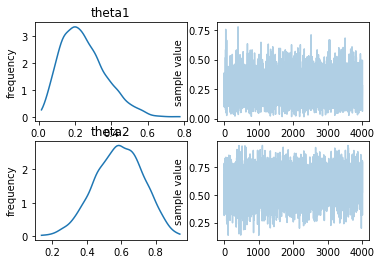

In [5]:
# Using the same model as in Question 1, just using the new data. 

data_list = dict(y1 = cowA, y2 = cowB, n1 = len(cowA), n2 = len(cowB))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

In [6]:
s = pd.DataFrame(stan_samples.extract())
np.mean(s.theta1 > s.theta2)

0.04175

## 4. Cows and milk
Farmer Jöns has a huge number of cows. Earlier this year he ran an experiment where he gave 10 cows a special diet that he had heard could make them produce more milk. He recorded the number of liters of milk from these “diet” cows and from 15 “normal” cows during one month. This is the data:

In [7]:
diet_milk = [651, 679, 374, 601, 401, 609, 767, 709, 704, 679]
normal_milk = [798, 1139, 529, 609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538]

**→ Jöns now wants to know: Was the diet any good, does it results in better milk production?**


In [8]:
# The Stan model as a string.
model_string = """
data {
  int n1;
  int n2;
  vector[n1] y1;
  vector[n2] y2;
}

parameters {
  real mu1;
  real mu2;
  real<lower=0> sigma1;
  real<lower=0> sigma2;
}

model {  
  mu1 ~ uniform(0, 2000);
  mu2 ~ uniform(0, 2000);
  sigma1 ~ uniform(0, 1000);
  sigma2 ~ uniform(0, 1000);
  y1 ~ normal(mu1, sigma1);
  y2 ~ normal(mu2, sigma2); 
}

generated quantities {
}
"""
data_list = dict(y1 = diet_milk, y2 = normal_milk, 
                  n1 = len(diet_milk), n2 = len(normal_milk))
# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d91770d58cef9a916c0a8b71913e8619 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpfkkwsqo6/stanfit4anon_model_d91770d58cef9a916c0a8b71913e8619_1677399265734094057.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_d91770d58cef9a916c0a8b71913e8619.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu1    615.78    1.08  51.23 511.46 584.25 615.72 647.14 717.37   2269    1.0
mu2    596.28    1.18  66.11  465.5 555.87 596.12 637.49 725.28   3156    1.0
sigma1 153.95     1.0  46.16  94.43 123.44 144.48 173.88 265.75   2129    1.0
sigma2 249.93    1.04  53.59  171.0 212.93 242.25 278.46 380.16   2659    1.0
lp__   -133.4    0.04   1.55 -137.3 -134.1 -133.0 -132.3 -131.5   1484    1.0

Samples were drawn using NUTS at Sun Nov  4 22:21:23 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


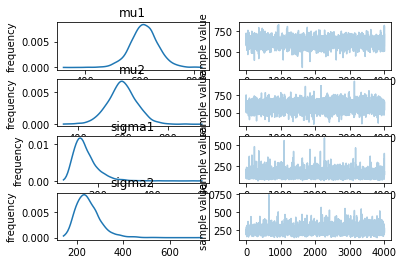

In [9]:
# Summary and plot
print(stan_samples)
print(stan_samples.plot())

## 6. Chickens and diet
Farmer Jöns has a huge number of cows. He also has chickens. He tries different diets on them too with the hope that they will produce more eggs. Below is the number of eggs produced in one week by chickens on a diet and chickens eating normal chicken stuff:

In [10]:
diet_eggs = [6, 4, 2, 3, 4, 3, 0, 4, 0, 6, 3]
normal_eggs = [4, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1]

**→ Jöns now wants to know: Was the diet any good, does it result in the chickens producing more eggs?**

**Hint:** The `poisson` distribution is a discrete distribution that is often a reasonable choice when one wants to model count data (like, for example, counts of eggs). The `poisson` has one parameter `λ` which stands for the mean count. In Stan you would use the Poisson like this:

`y ~ poisson(lambda);`

where y would be a single integer or an integer array of length n ( defined like int y[n];) and lambda a real number bounded at 0.0 (`real<lower=0> lambda;`)

In [11]:
# The Stan model as a string.
model_string = """
data {
  int n1;
  int n2;
  int y1[n1];
  int y2[n2];
}

parameters {
  real<lower=0> lambda1;
  real<lower=0> lambda2;
}

model {  
  lambda1 ~ uniform(0, 100);
  lambda2 ~ uniform(0, 100);
  y1 ~ poisson(lambda1);
  y2 ~ poisson(lambda2); 
}

generated quantities {
}
"""

data_list = dict(y1 = diet_eggs, y2 = normal_eggs, 
                  n1 = len(diet_eggs), n2 = len(normal_eggs))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6f9d9e6fda578d8bd7886a7be64f5670 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpm1nj3hyj/stanfit4anon_model_6f9d9e6fda578d8bd7886a7be64f5670_2272459721116487.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_6f9d9e6fda578d8bd7886a7be64f5670.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda1   3.28  9.4e-3   0.54   2.32    2.9   3.25   3.63   4.44   3368    1.0
lambda2    1.9  7.5e-3   0.42   1.17    1.6   1.86   2.16   2.79   3109    1.0
lp__     -1.74    0.03   0.98   -4.4  -2.14  -1.45  -1.04  -0.77   1536    1.0

Samples were drawn using NUTS at Sun Nov  4 22:22:07 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


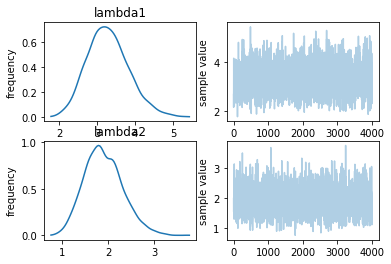

In [12]:
# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

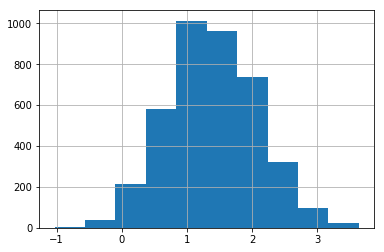

In [13]:
s = pd.DataFrame(stan_samples.extract())
lambda_diff = s.lambda1 - s.lambda2 
lambda_diff.hist()

In [14]:
np.mean(lambda_diff > 0)

0.98325

There is pretty good evidence that the diet is effective and that chickens on the diet produce more eggs on average (that is, `lambda1` seems higher than `lambda2`). Looking at `lambda_diff` a "best guess" is that the diet results in around 1-2 more eggs on average.

## 7. Cows and milk in a different data format
It's often common to have all data in a data frame. Inspect the following data frame d:

In [15]:
d = pd.DataFrame({'milk' : [651, 679, 374, 601, 401, 609, 767, 709, 704, 679, 798, 1139,
                            529, 609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538],
                 'group' : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 
                            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]})

Looking at `d` you should see that it contains the same data as in exercise (4) but coded with one cow per row (The mutant cows were perhaps just a dream…). The diet group is coded as a 1 and the normal group is coded as a 2. This data could be read into Stan by using the following data list:

**Hint:** In your Stan code you can loop over the group variable and use it to pick out the parameters belonging to that group like this:

`for(i in 1:n) {`

`  y[i] ~ normal( mu[x[i]], sigma[x[i]] ) `

`}`

Where `mu` and `sigma` now are 2-length vectors. This is also known as indexception: You use an index (`i`) to pick out an index (`x[i]`) to pick out a value (`mu[x[i]]`). As indexing is vectorised in Stan this can actually be shortened to just:

`y ~ normal( mu[x], sigma[x] );`

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d9b52e776fbe5900f9d9ab13f582d8d7 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpbbeiwjyt/stanfit4anon_model_d9b52e776fbe5900f9d9ab13f582d8d7_4557180409740932791.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_d9b52e776fbe5900f9d9ab13f582d8d7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]     617.5    0.95  49.88 518.47 586.35 617.23 647.28 721.49   2731    1.0
mu[2]    596.27    1.16   65.5 470.16 554.25 596.31 637.93  723.5   3179    1.0
sigma[1] 152.43    0.86  43.58  94.06  122.3 144.96 172.99 261.29   2563    1.0
sigma[2] 250.06    1.17  56.94 169.04 210.97 241.33 277.47 384.75   2353    1.0
lp__     -133.4    0.04    1.6 -137.5 -134.1 -133.0 -132.3 -131.5   1512    1.0

Samples were drawn using NUTS at Sun Nov  4 22:22:54 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


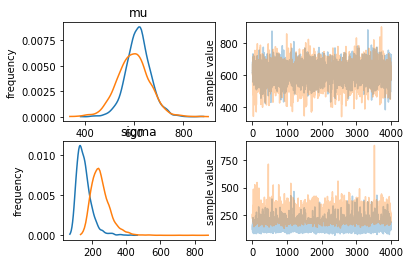

In [16]:
# The Stan model as a string.
model_string = """
data {
  int n;
  int n_groups;
  int x[n];
  vector[n] y;
}

parameters {
  vector[n_groups] mu;
  vector<lower=0>[n_groups] sigma;
}

model {  
  mu ~ uniform(0, 2000);
  sigma ~ uniform(0, 1000);
  y ~ normal(mu[x], sigma[x]);
}

generated quantities {
}
"""

data_list = dict(y = d.milk, x = d.group, n = len(d.milk), 
                  n_groups = max(d.group))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

## 8. Cows and more diets
Farmer Jöns has a huge number of cows. He also has a huge number of different diets he wants to try. In addition to the diet he already tried, he tries another diet (let’s call it diet 2) on 10 more cows. Copy-n-paste the following into R and inspect the resulting data frame `d`.

In [17]:
d = pd.DataFrame({'milk' : [651, 679, 374, 601, 401, 609, 767, 709, 704, 679, 798, 1139, 529,
                            609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538, 1061,
                            721, 595, 784, 877, 562, 800, 684, 741, 516],
                  'group' : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                             2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]})

It contains the same data as in the last exercise but with 10 added rows for diet 2 which is coded as group = 3.

**→ Now Jöns now wants to know: Which diet seems best, if any? How much more milk should he be expecting to produce using the best diet compared to the others?**

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d9b52e776fbe5900f9d9ab13f582d8d7 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpkkkl34k2/stanfit4anon_model_d9b52e776fbe5900f9d9ab13f582d8d7_2951138755536946798.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_d9b52e776fbe5900f9d9ab13f582d8d7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]    617.67    0.76  48.65 518.62 588.62 616.22  647.6 714.39   4127    1.0
mu[2]    597.37    0.97  65.72 467.78 554.89 596.64 640.61  726.1   4546    1.0
mu[3]    734.87    1.19  62.41 610.56 696.96 734.68 772.15 857.81   2773    1.0
sigma[1] 152.87    0.77  43.96  93.11 122.28 144.62 172.83 262.84   3284    1.0
sigma[2] 250.51    0.85  53.83 171.39 212.38 242.19 278.98 382.84   4012    1.0
sigma[3] 187.66    1.08  55.65 114.04 149.83 177.39 213.16 320.57   2640    1.0
lp__     -184.7    0.05    1.9 -189.5 -185.7 -184.3 -183.3 -182.1   1590    1.0

Samples were drawn using NUTS at Sun Nov  4 22:23:40 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

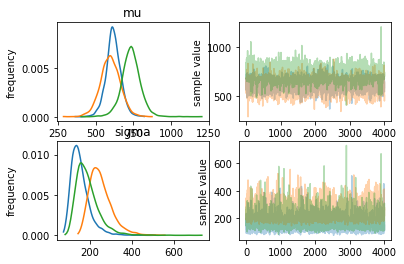

In [18]:
model_string = """
data {
  int n;
  int n_groups;
  int x[n];
  vector[n] y;
}

parameters {
  vector[n_groups] mu;
  vector<lower=0>[n_groups] sigma;
}

model {  
  mu ~ uniform(0, 2000);
  sigma ~ uniform(0, 1000);
  y ~ normal(mu[x], sigma[x]);
}

generated quantities {
}
"""
data_list = dict(y = d.milk, x = d.group, n = len(d.milk), 
                  n_groups = max(d.group))


# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

In [19]:
# Extract mu values, list comprehension to name data frame columns 
stan_samples_mu = stan_samples.extract()['mu']
s = pd.DataFrame(stan_samples_mu, columns = ['mu_%d' % i for i in range(max(d.group))])

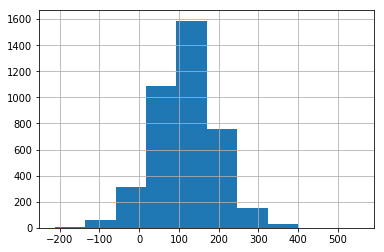

In [20]:
(s.mu_2 - s.mu_0).hist()

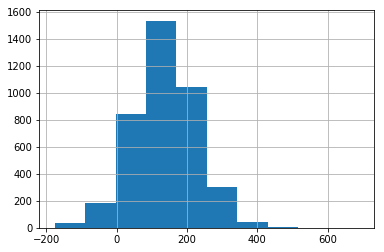

In [21]:
(s.mu_2 - s.mu_1).hist()

In [22]:
np.mean(s.mu_2 - s.mu_0 > 0)

0.935

In [23]:
np.mean(s.mu_2 - s.mu_1 > 0)

0.942

## 9. Cows and sunshine
Farmer Jöns has a huge number of cows. He is wondering whether the amount of time a cow spends outside in the sunshine affects how much milk she produces. To test this he makes a controlled experiment where he picks out 20 cows and assigns each a number of hours she should spend outside each day. The experiment runs for a month and Jöns records the number of liters of milk each cow produces. Copy-n-paste the following into R and inspect the resulting data frame `d`.

In [24]:
d = pd.DataFrame({'milk' : [685, 691, 476, 1151, 879, 725, 1190, 1107, 809, 539,
                            298, 805, 820, 498, 1026, 1217, 1177, 684, 1061, 834],
                 'hours' : [3, 7, 6, 10, 6, 5, 10, 11, 9, 3, 6, 6, 3, 5, 8, 11, 
                            12, 9, 5, 5]})

**→ Using this data on hours of sunshine and resulting liters of milk Jöns wants to know: Does sunshine affect milk production positively or negatively?**

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2a8ccdf4137ea717b5e8c9c3300bfae4 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpypishdl4/stanfit4anon_model_2a8ccdf4137ea717b5e8c9c3300bfae4_6133597461902926881.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_2a8ccdf4137ea717b5e8c9c3300bfae4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta0 399.87    3.64 139.97 119.96 310.09 398.27 488.88 683.73   1481    1.0
beta1  61.98    0.49   18.6  24.28  49.89  62.13  73.96  98.85   1443    1.0
sigma 223.94    0.93  39.71 162.72 195.42  217.9 246.05 319.15   1821    1.0
lp__  -111.9    0.04   1.34 -115.5 -112.5 -111.6 -111.0 -110.4   1312    1.0

Samples were drawn using NUTS at Sun Nov  4 22:24:26 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


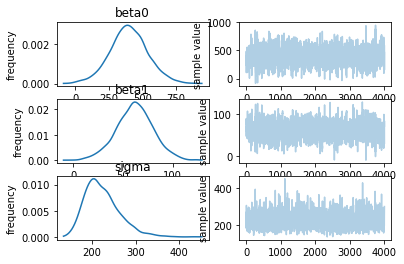

In [25]:
# The Stan model as a string.
model_string = """
data {
  int n;
  vector[n] x;
  vector[n] y;
}

parameters {
  real beta0;
  real beta1;
  real<lower=0> sigma;
}

model {  
  vector[n] mu;
  beta0 ~ uniform(-1000, 1000);
  beta1 ~ uniform(-1000, 1000);
  sigma ~ uniform(0, 1000);
  mu <- beta0 + beta1 * x;
  y ~ normal(mu, sigma);
}

generated quantities {
}
"""

data_list = dict(y = d.milk, x = d.hours, n = len(d.milk))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)
# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

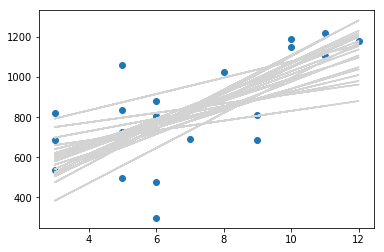

In [26]:
# Create scatter plot
plt.scatter(d.hours, d.milk)

# Adding a sample of the posterior draws to the plot in order to visualize the
# uncertainty of the regression line.
s = pd.DataFrame(stan_samples.extract())

for i in np.random.randint(len(s.index),size=20):
    plt.plot(d.hours, s.beta0[i] + d.hours*s.beta1[i], 'lightgray')

#abline(s[i,"beta0"], s[i,"beta1"], col = "gray")

It seems like there is good evidence that an increase in sunshine (or something that co-varies with sunshine perhaps…) results in an increase in milk production.